# **ANALISIS DATA: Studi Kasus (Brazilian E-Commerce Public Dataset by Olist)**

----

Nama: Abdurrohman Ibnul Mufadlol\
Github: https://github.com/ibnulmufadlol \
Dicoding Username: ibnulmufadlol\
Linkedin: https://www.linkedin.com/in/ibnulmufadlol

---
Data yang digunakan dapat diakses pada [Kaggle](https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce?resource=download)

Data tersebut terdiri dari beberapa table yang saling berkaitan.
- Customers
- Sellers
- Products
- Orders
- Orders Details
- Payment, Geolocation, Review

## **Menentukan Pertanyaan Bisnis**

1.   Daerah (state) manakah yang memiliki hasil analisa RFM terbaik?
2.   Apa saja 5 produk dan kategori teratas dan terbawah setiap tahunnya?
3.   Bagaimana SLA waktu pengiriman tercapai? Berapa banyak orderan over SLA, rata-rata waktu over SLA, dan dimana saja?
4.   Berapa total order per tanggal, dengan tanggal penjualan tertinggi dan terendah yang ditandai?
5.   Apa saja 5 metode pembayaran teratas setiap tahunnya?
6.   Berapa rata-rata skor ulasan yang diterima?

## Import Semua Packages/Library yang Digunakan

Disini saya menggunakan beberapa library, yaitu:
- `pandas` untuk mengolah dataset dan dataframe
- `matplotlib.pyplot` untuk membuat visualisasi grafil, plot, atau gambar
- `seaborn` untuk membuat visualisasi data yang lebih menarik

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#package yang dibutuhkan kemudian akan ditambahkan di sini

## Data Wrangling
### Gathering Data
Aku akan membuat sebuah function sederhana untuk load data agar tidak menulisnya berulang

In [2]:
# nama file / dataset
file_names = [
    "customers.csv",
    "geolocation.csv",
    "order_items.csv",
    "order_payments.csv",
    "order_reviews.csv",
    "orders.csv",
    "product_category.csv",
    "products.csv",
    "sellers.csv"
]

# load data
for file_name in file_names:
    df_name = file_name.split(".")[0] + "_df"
    globals()[df_name] = pd.read_csv(f"data/{file_name}")

In [3]:
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [4]:
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [5]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [6]:
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [7]:
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [8]:
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [9]:
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [10]:
product_category_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [11]:
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


**Insight**
* Terdapat 9 dataframe
* Setiap dataframe memiliki hubungan, jika ditulis secara menyeluruh berdasarkan key:
    * `order_id` terhubung dengan dataframe: order_items.csv, order_payments.csv, order_reviews.csv, orders.csv
    * `product_id` terhubung dengan dataframe: order_items.csv, products.csv
    * `customer_id` terhubung dengan dataframe: customers.csv, orders.csv
    * `product_category_name` terhubung dengan dataframe: products.csv, product_category,csv
    * `seller_id` terhubung dengan dataframe: sellers.csv, order_items.csv
    * `geolocation_zip_code_prefix` terhubung dengan dataframe: sellers.csv, customers.csv
* geolocation.csv tidak akan kita butuhkan apabila kita memiliki data geojson brazil untuk visualisasi data

### Assesing Data dan Cleaning Data

In [12]:
def check_data(df):
    """
    Fungsi untuk melakukan pengecekan awal pada data dalam sebuah DataFrame.
    Menampilkan info, jumlah nilai yang hilang, jumlah duplikasi, dan deskripsi statistik.
    
    Parameters:
    df (pd.DataFrame): DataFrame yang akan diperiksa.
    """
    # Menampilkan informasi dasar tentang DataFrame
    print("Informasi DataFrame:")
    print(df.info())
    
    # Menampilkan jumlah nilai yang hilang di setiap kolom
    print("\nJumlah nilai yang hilang di setiap kolom:")
    print(df.isna().sum())
    
    # Menampilkan jumlah duplikasi dalam DataFrame
    print("\nJumlah duplikasi:", df.duplicated().sum())
    
    # Menampilkan deskripsi statistik
    print("\nDeskripsi statistik:")
    print(df.describe(include="all"))

### 1. Check data customer

In [13]:
check_data(customers_df)

Informasi DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
None

Jumlah nilai yang hilang di setiap kolom:
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Jumlah duplikasi: 0

Deskripsi statistik:
                             customer_id                customer_unique_id  \
count                              99441                             99441   
unique                           

In [14]:
check_data(geolocation_df)

Informasi DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB
None

Jumlah nilai yang hilang di setiap kolom:
geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

Jumlah duplikasi: 261831

Deskripsi statistik:
        geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
count                  1.000163e+06  

In [15]:
duplicates_geolocation = geolocation_df[geolocation_df.duplicated()]
duplicates_geolocation.sort_values(by="geolocation_zip_code_prefix", ascending=True).head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
1435,1001,-23.549292,-46.633559,sao paulo,SP
771,1001,-23.550498,-46.634338,sao paulo,SP
596,1001,-23.550498,-46.634338,sao paulo,SP
1004,1001,-23.549292,-46.633559,sao paulo,SP
1246,1001,-23.549292,-46.633559,sao paulo,SP


<span style="color:red">^ kita akan `drop_duplicates()`, karena relation dengan table seller dan customers berada pada `geolocation_zip_code_prefix` dan akan membuat ambigu jika key nya duplicate.</span>

### 2. Check data geolocation

In [16]:
geolocation_df.drop_duplicates(inplace=True)

In [17]:
#cek ulang datanya
check_data(geolocation_df)

Informasi DataFrame:
<class 'pandas.core.frame.DataFrame'>
Index: 738332 entries, 0 to 1000161
Data columns (total 5 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   geolocation_zip_code_prefix  738332 non-null  int64  
 1   geolocation_lat              738332 non-null  float64
 2   geolocation_lng              738332 non-null  float64
 3   geolocation_city             738332 non-null  object 
 4   geolocation_state            738332 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 33.8+ MB
None

Jumlah nilai yang hilang di setiap kolom:
geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

Jumlah duplikasi: 0

Deskripsi statistik:
        geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
count                 738332.000000    738332.000000   

### 3. Check data order

In [18]:
check_data(orders_df)

Informasi DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB
None

Jumlah nilai yang hilang di setiap kolom:
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
ord

In [19]:
#cek missing value order_approved_at
orders_df[orders_df.order_approved_at.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaN,NaN,NaN,2018-09-12 00:00:00
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaN,NaN,NaN,2018-10-17 00:00:00
1868,df8282afe61008dc26c6c31011474d02,aa797b187b5466bc6925aaaa4bb3bed1,canceled,2017-03-04 12:14:30,NaN,NaN,NaN,2017-04-10 00:00:00
2029,8d4c637f1accf7a88a4555f02741e606,b1dd715db389a2077f43174e7a675d07,canceled,2018-08-29 16:27:49,NaN,NaN,NaN,2018-09-13 00:00:00
2161,7a9d4c7f9b068337875b95465330f2fc,7f71ae48074c0cfec9195f88fcbfac55,canceled,2017-05-01 16:12:39,NaN,NaN,NaN,2017-05-30 00:00:00
...,...,...,...,...,...,...,...,...
97696,5a00b4d35edffc56b825c3646a99ba9d,6a3bdf004ca96338fb5fad1b8d93c2e6,canceled,2017-07-02 15:38:46,NaN,NaN,NaN,2017-07-25 00:00:00
98415,227c804e2a44760671a6a5697ea549e4,62e7477e75e542243ee62a0ba73f410f,canceled,2017-09-28 15:02:56,NaN,NaN,NaN,2017-10-16 00:00:00
98909,e49e7ce1471b4693482d40c2bd3ad196,e4e7ab3f449aeb401f0216f86c2104db,canceled,2018-08-07 11:16:28,NaN,NaN,NaN,2018-08-10 00:00:00
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaN,NaN,NaN,2018-10-01 00:00:00


<span style="color:green">^ missing value disebabkan karena `order_status`:`canceled`. sehingga kita tidak perlu ubah. ~dengan pengalaman bekerja di aggregator 3PL</span>

In [20]:
#cek missing value order_delivered_carrier_date
orders_df[orders_df.order_delivered_carrier_date.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaN,NaN,2018-08-21 00:00:00
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaN,NaN,2017-10-03 00:00:00
266,8e24261a7e58791d10cb1bf9da94df5c,64a254d30eed42cd0e6c36dddb88adf0,unavailable,2017-11-16 15:09:28,2017-11-16 15:26:57,NaN,NaN,2017-12-05 00:00:00
324,d3c8851a6651eeff2f73b0e011ac45d0,957f8e082185574de25992dc659ebbc0,processing,2016-10-05 22:44:13,2016-10-06 15:51:05,NaN,NaN,2016-12-09 00:00:00
...,...,...,...,...,...,...,...,...
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaN,NaN,NaN,2018-10-01 00:00:00
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 07:18:05,NaN,NaN,2018-02-06 00:00:00
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,NaN,NaN,NaN,2018-09-27 00:00:00
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaN,NaN,2017-09-15 00:00:00


In [21]:
missing_deliv_carrier_date = orders_df[orders_df.order_delivered_carrier_date.isna()]
missing_deliv_carrier_date["order_status"].unique()

array(['invoiced', 'processing', 'unavailable', 'canceled', 'created',
       'approved', 'delivered'], dtype=object)

^ `order_delivered_carrier_date` ataupun `order_delivered_customer_date` biasanya akan terisi ketika orderan berhasil ter-pickup. namun kekosongan ini diakibatkan oleh human error pada sisi kurir. kita tidak bisa melakukan pengisian data ataupun menghapus data tersebut karena akan merusak data dan membuat data menjadi bias. kita ubah saja tipe datanya pada semua kolom date

In [22]:
datetime_columns = ["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date"]
 
for column in datetime_columns:
  orders_df[column] = pd.to_datetime(orders_df[column])
    
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


### 4. Check data order items

In [23]:
check_data(order_items_df)

Informasi DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB
None

Jumlah nilai yang hilang di setiap kolom:
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

Jumlah duplikasi: 0

Deskripsi statistik:
                                order_id  order_item_id  \
count     

In [24]:
order_items_df["shipping_limit_date"] = pd.to_datetime(order_items_df["shipping_limit_date"])
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


### 5. Check data order payments

In [25]:
check_data(order_payments_df)

Informasi DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB
None

Jumlah nilai yang hilang di setiap kolom:
order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

Jumlah duplikasi: 0

Deskripsi statistik:
                                order_id  payment_sequential payment_type  \
count                             103886       103886.000000       103886   
unique                             99440               

In [26]:
check_payment_sequential = order_payments_df[order_payments_df['order_id'] == 'fa65dad1b0e818e3ccc5cb0e39231352'].sort_values(by='payment_sequential', ascending=False)
print(check_payment_sequential)

                                order_id  payment_sequential payment_type  \
39108   fa65dad1b0e818e3ccc5cb0e39231352                  29      voucher   
39111   fa65dad1b0e818e3ccc5cb0e39231352                  28      voucher   
4885    fa65dad1b0e818e3ccc5cb0e39231352                  27      voucher   
79587   fa65dad1b0e818e3ccc5cb0e39231352                  26      voucher   
24879   fa65dad1b0e818e3ccc5cb0e39231352                  25      voucher   
99213   fa65dad1b0e818e3ccc5cb0e39231352                  24      voucher   
85166   fa65dad1b0e818e3ccc5cb0e39231352                  23      voucher   
100606  fa65dad1b0e818e3ccc5cb0e39231352                  22      voucher   
74239   fa65dad1b0e818e3ccc5cb0e39231352                  21      voucher   
93337   fa65dad1b0e818e3ccc5cb0e39231352                  20      voucher   
74721   fa65dad1b0e818e3ccc5cb0e39231352                  19      voucher   
80321   fa65dad1b0e818e3ccc5cb0e39231352                  18      voucher   

### 6. Check data order review

In [27]:
check_data(order_reviews_df)

Informasi DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB
None

Jumlah nilai yang hilang di setiap kolom:
review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

Jumlah duplikasi: 0

Deskripsi statistik:
         

^ seperti yang kita tahu, komentar dalam review itu tidak wajib, atau nullable. jadi kita ubah data date nya saja

In [28]:
review_datetime_columns = ["review_creation_date", "review_answer_timestamp"]
 
for column in review_datetime_columns:
  order_reviews_df[column] = pd.to_datetime(order_reviews_df[column])
    
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     11568 non-null  object        
 4   review_comment_message   40977 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


### 7. Check data produk

In [29]:
check_data(products_df)

Informasi DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB
None

Jumlah nilai yang hilang di setiap kolom:
product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_

In [30]:
products_df[products_df.product_category_name.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


In [31]:
#cek apakah order yang memiliki missing value tekoneksi pada order_items
check_orders_product_df = pd.merge(
    left=order_items_df,
    right=products_df,
    how="left",
    right_on="product_id",
    left_on="product_id"
)
check_orders_product_df[check_orders_product_df.product_category_name.isna()]

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
123,0046e1d57f4c07c8c92ab26be8c3dfc0,1,ff6caf9340512b8bf6d2a2a6df032cfa,38e6dada03429a47197d5d584d793b41,2017-10-02 15:49:17,7.79,7.78,NaN,NaN,NaN,NaN,200.0,16.0,5.0,12.0
125,00482f2670787292280e0a8153d82467,1,a9c404971d1a5b1cbc2e4070e02731fd,702835e4b785b67a084280efca355756,2017-02-17 16:18:07,7.60,10.96,NaN,NaN,NaN,NaN,700.0,35.0,14.0,11.0
132,004f5d8f238e8908e6864b874eda3391,1,5a848e4ab52fd5445cdc07aab1c40e48,c826c40d7b19f62a09e2d7c5e7295ee2,2018-03-06 09:29:25,122.99,15.61,NaN,NaN,NaN,NaN,400.0,20.0,12.0,15.0
142,0057199db02d1a5ef41bacbf41f8f63b,1,41eee23c25f7a574dfaf8d5c151dbb12,e5a3438891c0bfdb9394643f95273d8e,2018-01-25 09:07:51,20.30,16.79,NaN,NaN,NaN,NaN,200.0,16.0,2.0,11.0
171,006cb7cafc99b29548d4f412c7f9f493,1,e10758160da97891c2fdcbc35f0f031d,323ce52b5b81df2cd804b017b7f09aa7,2018-02-22 13:35:28,56.00,14.14,NaN,NaN,NaN,NaN,2200.0,16.0,2.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112306,ff24fec69b7f3d30f9dc1ab3aee7c179,1,5a848e4ab52fd5445cdc07aab1c40e48,c826c40d7b19f62a09e2d7c5e7295ee2,2018-02-01 02:40:12,122.99,15.61,NaN,NaN,NaN,NaN,400.0,20.0,12.0,15.0
112333,ff3024474be86400847879103757d1fd,1,f9b1795281ce51b1cf39ef6d101ae8ab,3771c85bac139d2344864ede5d9341e3,2017-11-21 03:55:39,39.90,9.94,NaN,NaN,NaN,NaN,400.0,32.0,15.0,15.0
112350,ff3a45ee744a7c1f8096d2e72c1a23e4,1,b61d1388a17e3f547d2bc218df02335b,07017df32dc5f2f1d2801e579548d620,2017-05-10 10:15:19,139.00,21.42,NaN,NaN,NaN,NaN,350.0,16.0,6.0,11.0
112438,ff7b636282b98e0aa524264b295ed928,1,431df35e52c10451171d8037482eeb43,6cd68b3ed6d59aaa9fece558ad360c0a,2018-02-22 15:35:35,49.90,15.11,NaN,NaN,NaN,NaN,475.0,21.0,15.0,21.0


^ karena produk yang memiliki missing value banyak yang terdapat orderannya, maka data ini tidak akan kita eliminasi

### 8. Check data kategori produk

In [32]:
check_data(product_category_df)

Informasi DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB
None

Jumlah nilai yang hilang di setiap kolom:
product_category_name            0
product_category_name_english    0
dtype: int64

Jumlah duplikasi: 0

Deskripsi statistik:
       product_category_name product_category_name_english
count                     71                            71
unique                    71                            71
top             beleza_saude                 health_beauty
freq                       1                             1


In [33]:
check_data(sellers_df)

Informasi DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB
None

Jumlah nilai yang hilang di setiap kolom:
seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

Jumlah duplikasi: 0

Deskripsi statistik:
                               seller_id  seller_zip_code_prefix seller_city  \
count                               3095             3095.000000        3095   
unique                              3095                     NaN         611   
top     3442f8959a84dea7ee197c632cb2df15              

## Exploratory Data Analysis (EDA)
 Pada hasil assesing data, kita mendapatkan kesimpulan:
 * tidak semua data tanggal pada tabel `orders`terisi dengan baik, namun kita dapat memanfaatkannya untuk menganalisa berbagai hal tergantung pada status ordernya
 * tidak ada nama seller ataupun customer,
 * judul komentar dan isi komentar tidak wajib dalam sebuah review, namun setiap review wajib memberikan score antara 1 - 5
 * tidak ada nama produk ataupun deskripsi produk, hanya tersedia nama dari kategori produk dalam bahasa brazil dan inggris
 * pembayaran dapat dilakukan dengan metode cicilan, data menunjukkan max payment installment sebesar 24x, dan
 * 1 order dapat dilakukan pembayaran terpisah dengan menggabungkan berbagai metode pembayaran. data terbanyak adalah sebesar 29 voucher berbeda

### 1. Explore Data Orders
Kita akan melakukan eksplorasi terhadap order status yang ada pada table order untuk memahami tahapan dari sebuah order

In [34]:
order_status_value = orders_df['order_status'].unique()
print('Status Order: ', order_status_value)

Status Order:  ['delivered' 'invoiced' 'shipped' 'processing' 'unavailable' 'canceled'
 'created' 'approved']


Dari data diatas, kita dapat menyimpulkan bahwa tahapan order adalah:
1. created -> order dibuat
2. invoiced -> order menunggu pembayaran
3. appoved -> order valid
4. processing -> order diproses seller
5. shipped -> order dikirim
6. delivered -> order diterima
7. canceled -> orderan batal
8. unavailable -> orderan ditolak seller/product tidak tersedia

oleh karena itu, kita dapat menentukan `order_date` untuk orderan yang valid adalah dari datetime `order_approved_at`

In [35]:
orders_df = orders_df.rename(columns={"order_approved_at":"order_date"})
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_date                     99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


### 2. Explore Data Order Payment

In [36]:
payment_method_value = order_payments_df['payment_type'].unique()
print('Metode Pemabayaran: ', payment_method_value)

Metode Pemabayaran:  ['credit_card' 'boleto' 'voucher' 'debit_card' 'not_defined']


In [37]:
check_order_payment = pd.merge(
    left=orders_df,
    right=order_payments_df,
    how='left',
    left_on='order_id',
    right_on='order_id'
)
check_order_payment = check_order_payment[check_order_payment['payment_type'] == 'not_defined']
check_order_payment.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_date,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value
1175,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaT,NaT,NaT,2018-09-12,1.0,not_defined,1.0,0.0
41785,4637ca194b6387e2d538dc89b124b0ee,a73c1f73f5772cf801434bf984b0b1a7,canceled,2018-09-03 14:14:25,NaT,NaT,NaT,2018-09-10,1.0,not_defined,1.0,0.0
42113,c8c528189310eaa44a745b8d9d26908b,197a2a6a77da93f678ea0d379f21da0a,canceled,2018-08-28 20:05:14,NaT,NaT,NaT,2018-09-11,1.0,not_defined,1.0,0.0


Metode pembayaran yang tidak diketahui adalah untuk order yang dibatalkan dan belum mencapai tahapan invoice

### 3. Explore Data Product dan Product Category
dari hasil assesing data terdapat 73 unique value pada products_df namun di product_category_df hanya ada 71 unique value

In [38]:
unique_product_categories_products = set(products_df['product_category_name'].unique())
unique_product_categories_category = set(product_category_df['product_category_name'].unique())

#mencari data kategori produk yang berbeda
difference_in_products = unique_product_categories_products - unique_product_categories_category

print("Kategori berbeda: ", difference_in_products)

Kategori berbeda:  {'pc_gamer', 'portateis_cozinha_e_preparadores_de_alimentos', nan}


In [39]:
#kita akan tambahkan data diatas ke dalam table product_category_df
additional_rows = pd.DataFrame({
    'product_category_name': [None, 'pc_gamer', 'portateis_cozinha_e_preparadores_de_alimentos'],
    'product_category_name_english': ['not_defined', 'pc_gamer', 'portable_kitchen_and_food_preparators']
})

#tambah ke row terakhir
product_category_df = pd.concat([product_category_df, additional_rows], ignore_index=True)

print(product_category_df.tail(5))  # tampilkan 5 baris terakhir

                            product_category_name  \
69                  fashion_roupa_infanto_juvenil   
70                             seguros_e_servicos   
71                                           None   
72                                       pc_gamer   
73  portateis_cozinha_e_preparadores_de_alimentos   

            product_category_name_english  
69              fashion_childrens_clothes  
70                  security_and_services  
71                            not_defined  
72                               pc_gamer  
73  portable_kitchen_and_food_preparators  


### 4. Analisa Konsumen

In [40]:
cust_order_df = pd.merge(
    left=customers_df,
    right=orders_df,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)

rfm_df = pd.merge(
    left=cust_order_df,
    right=order_payments_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)

rfm_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_date,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,1.0,credit_card,2.0,146.87
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,1.0,credit_card,8.0,335.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,1.0,credit_card,7.0,157.73
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,1.0,credit_card,1.0,173.30
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,1.0,credit_card,8.0,252.25


### 5. Analisa order, metode pembayaran, dan review

In [41]:
statuses_to_remove = ['invoiced', 'unavailable', 'canceled', 'created']

#kita ambil hanya orderan yang masih dibayar, diproses, diterima, ataupun retur
rfm_df = rfm_df[~rfm_df["order_status"].isin(statuses_to_remove)]

#kita ubah order_approved_at sebagai order_date -> karena orderan ini yang sudah dibayar dan dianggapp sebagai orderan yang valid
rfm_df['order_date'] = rfm_df['order_date'].dt.date

rfm_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_date,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,1.0,credit_card,2.0,146.87
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,1.0,credit_card,8.0,335.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,1.0,credit_card,7.0,157.73
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,1.0,credit_card,1.0,173.30
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,1.0,credit_card,8.0,252.25


In [42]:
rfm_df["order_date"] = pd.to_datetime(rfm_df["order_date"])
result_rfm_df = rfm_df.groupby(by="customer_state", as_index=False).agg({
    "order_date": "max",
    "order_id": "nunique",
    "payment_value": "sum"
})
result_rfm_df.columns = ["customer_state", "max_order_timestamp", "frequency", "monetary"]

recent_date = rfm_df["order_date"].max()
result_rfm_df["recency"] = result_rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)

result_rfm_df.drop("max_order_timestamp", axis=1, inplace=True)

result_rfm_df.sort_values(by="monetary", ascending=False).head(10)

,customer_state,frequency,monetary,recency
25,SP,40966,5848111.81,0
18,RJ,12671,2110113.76,5
10,MG,11457,1834249.17,5
22,RS,5396,871986.39,6
17,PR,4967,791593.36,5
4,BA,3335,605046.58,13
23,SC,3588,604860.64,7
6,DF,2117,351168.71,8
8,GO,1993,339983.11,10
7,ES,2014,321249.63,9


In [43]:
#menganalisa bulan dengan orderan tertinggi dan terendah
monthly_order_volume = orders_df.groupby(orders_df['order_date'].dt.to_period("M"))['order_date'].count()

# Menemukan bulan dengan volume pesanan tertinggi dan terendah
highest_volume_month = monthly_order_volume.idxmax()
lowest_volume_month = monthly_order_volume.idxmin()
highest_volume_value = monthly_order_volume.max()
lowest_volume_value = monthly_order_volume.min()

# Menampilkan bulan dengan volume pesanan tertinggi dan terendah serta nilainya
print("Bulan dengan volume pesanan tertinggi:", highest_volume_month, "dengan jumlah pesanan:", highest_volume_value)
print("Bulan dengan volume pesanan terendah:", lowest_volume_month, "dengan jumlah pesanan:", lowest_volume_value)

Bulan dengan volume pesanan tertinggi: 2017-11 dengan jumlah pesanan: 7395
Bulan dengan volume pesanan terendah: 2016-09 dengan jumlah pesanan: 1


In [44]:
late_orders = orders_df[orders_df['order_delivered_customer_date'] > orders_df['order_estimated_delivery_date']]

late_orders_area = pd.merge(
    left=late_orders,
    right=customers_df,
    how="left",
    right_on="customer_id",
    left_on="customer_id"
)
late_orders_area.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_date,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,203096f03d82e0dffbc41ebc2e2bcfb7,d2b091571da224a1b36412c18bc3bbfe,delivered,2017-09-18 14:31:30,2017-09-19 04:04:09,2017-10-06 17:50:03,2017-10-09 22:23:46,2017-09-28,d699688533772c15a061e8ce81cb56df,4001,sao paulo,SP
1,fbf9ac61453ac646ce8ad9783d7d0af6,3a874b4d4c4b6543206ff5d89287f0c3,delivered,2018-02-20 23:46:53,2018-02-22 02:30:46,2018-02-26 22:25:22,2018-03-21 22:03:54,2018-03-12,a25d5f94840d3c6a1a49f271ed83f4ec,21715,rio de janeiro,RJ
2,8563039e855156e48fccee4d611a3196,5f16605299d698660e0606f7eae2d2f9,delivered,2018-02-17 15:59:46,2018-02-17 16:15:34,2018-02-20 23:03:56,2018-03-20 00:59:25,2018-03-20,92fd8aa5948e20c43a014c44c025c5e1,77480,alvorada,TO
3,6ea2f835b4556291ffdc53fa0b3b95e8,c7340080e394356141681bd4c9b8fe31,delivered,2017-11-24 21:27:48,2017-11-25 00:21:09,2017-12-13 21:14:05,2017-12-28 18:59:23,2017-12-21,3e4fd73f1e86b135b9b121d6abbe9597,19400,presidente venceslau,SP
4,66e4624ae69e7dc89bd50222b59f581f,684fa6da5134b9e4dab731e00011712d,delivered,2018-03-09 14:50:15,2018-03-09 15:40:39,2018-03-15 00:31:19,2018-04-03 13:28:46,2018-04-02,ddf60e20e6e262e2136801ce5cd628b0,49030,aracaju,SE


In [45]:
late_order_count = late_orders['order_id'].nunique()

print("Jumlah order melebihi SLA: " + str(late_order_count) + " order")

Jumlah order melebihi SLA: 7827 order


In [46]:
late_orders_modify = late_orders.copy()
late_orders_modify['late_days'] = (late_orders_modify['order_delivered_customer_date'] - late_orders_modify['order_estimated_delivery_date']).dt.days
average_late_days = round(late_orders_modify['late_days'].mean(), 2)

print("Rata-rata Waktu Over SLA: " + str(average_late_days) + " hari")

Rata-rata Waktu Over SLA: 8.87 hari


In [47]:
top_5_late_order_states = (late_orders_area['customer_state']
                           .value_counts()
                           .head(5))  # Get the top 5

print("Top 5 Negara Bagian dengan Order Melebihi SLA/ETA:\n", top_5_late_order_states)

Top 5 Negara Bagian dengan Order Melebihi SLA/ETA:
 customer_state
SP    2387
RJ    1664
MG     638
BA     457
RS     382
Name: count, dtype: int64


In [48]:
#analisa metode pembayaran populer
payment_type_counts = order_payments_df.groupby('payment_type')['order_id'].nunique()
payment_type_counts.head()

payment_type
boleto         19784
credit_card    76505
debit_card      1528
not_defined        3
voucher         3866
Name: order_id, dtype: int64

In [49]:
#analisa order review
average_review_score = order_reviews_df['review_score'].mean()

print("Rata-rata rating :", round(average_review_score, 2))

Rata-rata rating : 4.09


In [50]:
review_score_count = order_reviews_df.groupby('review_score')['order_id'].nunique()
review_score_count.head()

review_score
1    11393
2     3148
3     8160
4    19098
5    57076
Name: order_id, dtype: int64

In [51]:
#melihat review yang memiliki komentar, namun sayang komentar tersimpan dalam bahasa protugis/brazil
low_score_reviews = order_reviews_df[order_reviews_df['review_score'].isin([1, 2])]

low_score_reviews_filtered = low_score_reviews[['review_comment_title', 'review_comment_message']]
low_score_reviews_filtered = low_score_reviews_filtered.dropna(subset=['review_comment_message', 'review_comment_title'])

low_score_reviews_filtered.head()

,review_comment_title,review_comment_message
19,Não chegou meu produto,Péssimo
167,Médio,A peça não serviu
190,falta de produto e quebra,Faltou 1 produto e os que recebi 1 veio quebrado
197,não recebi ainda,aqui está descrevendo como entregue só que ate...
276,Horrível,Cancelaram a minha compra um dia antes da entr...


### 6. Analisa Produk

In [52]:
order_prod_category_df = pd.merge(
    left=order_items_df,
    right=products_df,
    how="left",
    left_on="product_id",
    right_on="product_id"
)

en_order_prod_category_df = pd.merge(
    left=order_prod_category_df,
    right=product_category_df,
    how="left",
    left_on="product_category_name",
    right_on="product_category_name"
)

en_order_prod_category_df.drop("product_category_name", axis=1, inplace=True)
en_order_prod_category_df = en_order_prod_category_df.rename(columns={'product_category_name_english': 'product_category'})

en_order_prod_category_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,pet_shop
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,59.0,695.0,2.0,3050.0,33.0,13.0,33.0,furniture_decor
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,42.0,480.0,1.0,200.0,16.0,10.0,15.0,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,59.0,409.0,1.0,3750.0,35.0,40.0,30.0,garden_tools


In [53]:
#mencari order_date
en_order_prod_category_df = pd.merge(
    left=orders_df,
    right=en_order_prod_category_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)

In [54]:
statuses_to_remove = ['invoiced', 'unavailable', 'canceled', 'created']

#kita ambil hanya orderan yang sudah dibayar, diproses, diterima
en_order_prod_category_df = en_order_prod_category_df[~en_order_prod_category_df["order_status"].isin(statuses_to_remove)]

#kita ubah order_approved_at sebagai order_date -> karena orderan ini yang sudah dibayar dan dianggapp sebagai orderan yang valid
en_order_prod_category_df['order_date'] = en_order_prod_category_df['order_date'].dt.date
en_order_prod_category_df['year'] = pd.to_datetime(en_order_prod_category_df['order_date']).dt.year.astype('Int64')
en_order_prod_category_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_date,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category,year
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,87285b34884572647811a353c7ac498a,...,8.72,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,2017
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1.0,595fac2a385ac33a80bd5114aec74eb8,...,22.76,29.0,178.0,1.0,400.0,19.0,13.0,19.0,perfumery,2018
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1.0,aa4383b373c6aca5d8797843e5594415,...,19.22,46.0,232.0,1.0,420.0,24.0,19.0,21.0,auto,2018
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,...,27.20,59.0,468.0,3.0,450.0,30.0,10.0,20.0,pet_shop,2017
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1.0,65266b2da20d04dbe00c5c2d3bb7859e,...,8.72,38.0,316.0,4.0,250.0,51.0,15.0,15.0,stationery,2018


In [55]:
category_order_counts_per_year = (en_order_prod_category_df
                                  .groupby(['product_category', 'year'])
                                  .size()
                                  .reset_index(name='order_count')
                                  .sort_values(by=['product_category', 'year']))

top_categories_per_year = (category_order_counts_per_year
                           .sort_values(['year', 'order_count'], ascending=[True, False])
                           .groupby('year')
                           .head(5))  # kita pilih 5 saja per tahun

print(top_categories_per_year)

          product_category  year  order_count
95         furniture_decor  2016           69
105          health_beauty  2016           46
147              perfumery  2016           29
171                   toys  2016           24
161         sports_leisure  2016           17
19          bed_bath_table  2017         5199
96         furniture_decor  2017         4112
162         sports_leisure  2017         4054
106          health_beauty  2017         3631
37   computers_accessories  2017         3057
107          health_beauty  2018         5921
20          bed_bath_table  2018         5872
38   computers_accessories  2018         4675
163         sports_leisure  2018         4485
97         furniture_decor  2018         4100


In [56]:
# Menghitung total pesanan per kategori produk di semua tahun
total_category_order_counts = (en_order_prod_category_df
                               .groupby('product_category')
                               .size()
                               .reset_index(name='total_order_count')
                               .sort_values(by='total_order_count', ascending=False))

# Memilih top 5 kategori produk berdasarkan total pesanan di semua tahun
top_categories_all_years = total_category_order_counts.head()
top_categories_all_years.head()

,product_category,total_order_count
7,bed_bath_table,11080
43,health_beauty,9598
68,sports_leisure,8558
39,furniture_decor,8284
15,computers_accessories,7744


## Visualization & Explanatory Analysis
Setelah data selesai kita explore dan analisa, kini saatnya memanfaatkan hasilnya untuk melakukan menjawab pertanyaan bisnis dan memberikan insight dengan visualisasi data

### 1. Daerah (state) manakah yang memiliki hasil analisa RFM terbaik?
untuk menjawab pertanyaan ini kita dapat memanfaatkan data pada table `customers_df`.
- Data ini biasanya dimanfaatkan tim marketing ataupun strategis untuk scale up pasar mereka pada daerah yang sudah matang

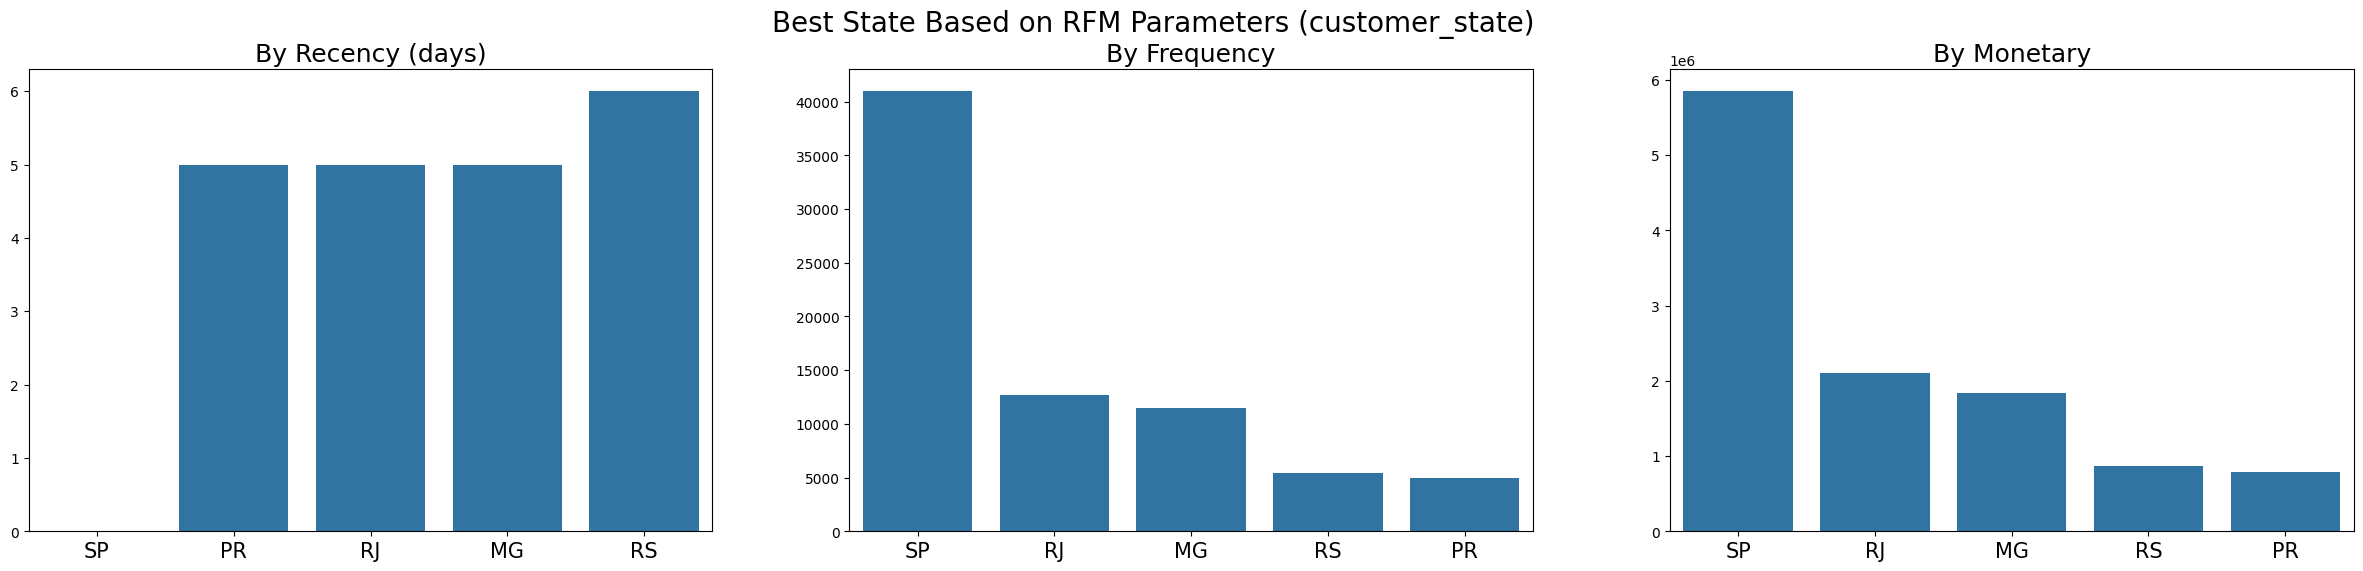

In [57]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))
 
sns.barplot(y="recency", x="customer_state", data=result_rfm_df.sort_values(by="recency", ascending=True).head(5), ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=15)
 
sns.barplot(y="frequency", x="customer_state", data=result_rfm_df.sort_values(by="frequency", ascending=False).head(5), ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)
 
sns.barplot(y="monetary", x="customer_state", data=result_rfm_df.sort_values(by="monetary", ascending=False).head(5), ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)
 
plt.suptitle("Best State Based on RFM Parameters (customer_state)", fontsize=20)
plt.show()

### 2. Apa saja 5 produk dan kategori teratas dan terbawah setiap tahunnya?
Data ini dapat dimanfaatkan bagi pengelola marketplace untuk memperbanyak seller dengan produk kategori yang sesuai market.

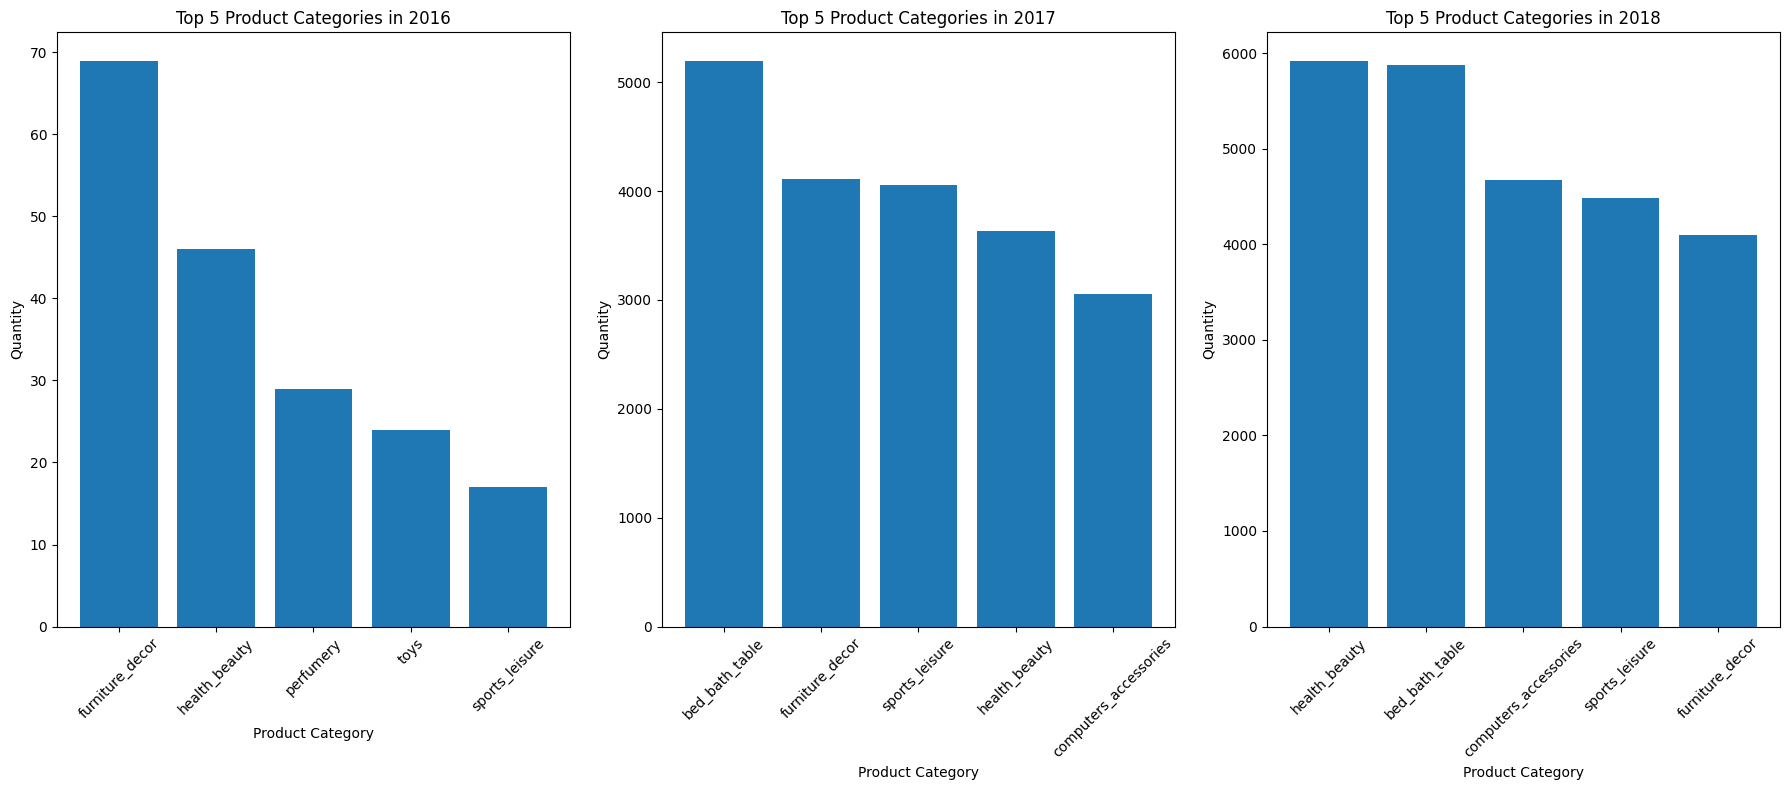

In [58]:
unique_years = top_categories_per_year['year'].unique()

plt.figure(figsize=(18, 8))
n_cols = 3
n_rows = 1

# kita buat barchart dengan anggapan kita sudah tahu data terdiri dari 3 tahun saja
for i, year in enumerate(unique_years, 1):
    yearly_data = top_categories_per_year[top_categories_per_year['year'] == year]
    plt.subplot(n_rows, n_cols, i)
    plt.bar(yearly_data['product_category'], yearly_data['order_count'])
    plt.title(f'Top 5 Product Categories in {year}')
    plt.xlabel('Product Category')
    plt.ylabel('Quantity')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### 3. Bagaimana SLA waktu pengiriman tercapai? Berapa banyak orderan over SLA, rata-rata waktu over SLA, dan dimana saja?
Matriks ini digunakan untuk mengevaluasi performa 3PL sebagai mitra pengiriman

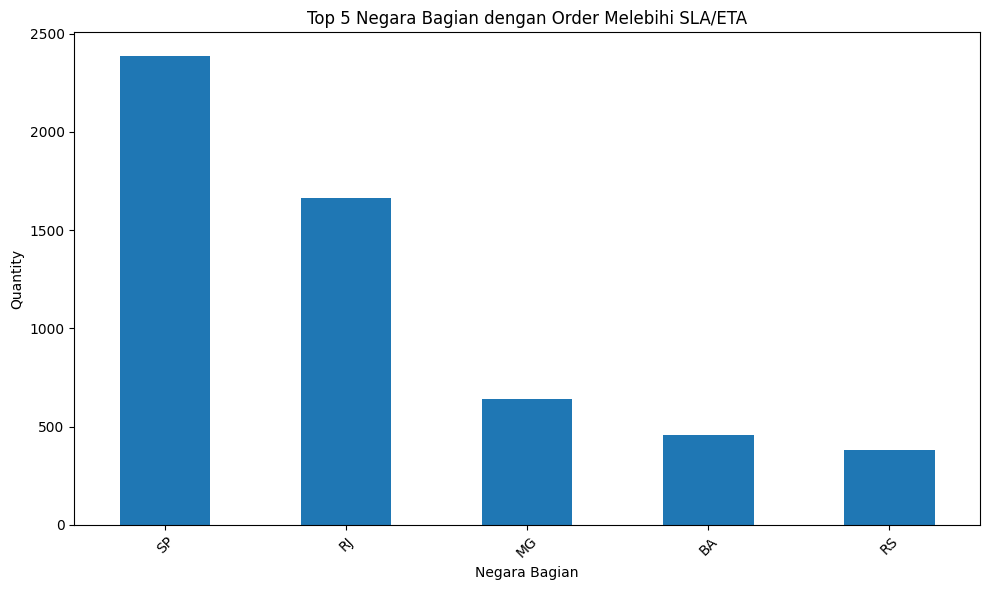

In [59]:
plt.figure(figsize=(10, 6))
top_5_late_order_states.plot(kind='bar')

# Customize the plot
plt.title("Top 5 Negara Bagian dengan Order Melebihi SLA/ETA")
plt.xlabel("Negara Bagian")
plt.ylabel("Quantity")
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()

### 4. Berapa total order per tanggal, dengan tanggal penjualan tertinggi dan terendah yang ditandai?
Matriks sederhana yang dapat digunakan untuk menganalisa trend order setiap bulan sebagai dasar analisa "mengapa bulan x orderan banyak?" dan "mengapa bulan y orderannya turun/sedikit?"

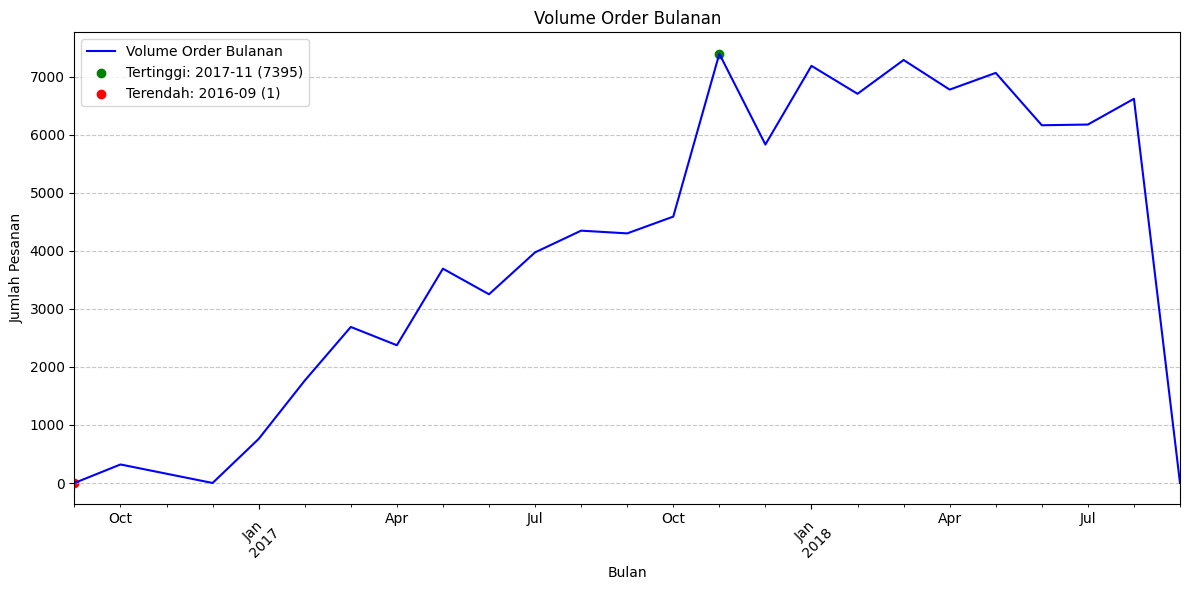

In [60]:
# Membuat line chart
plt.figure(figsize=(12, 6))
monthly_order_volume.plot(kind='line', color='blue', label='Volume Order Bulanan')

# Menandai bulan dengan volume tertinggi dan terendah
plt.scatter([highest_volume_month.to_timestamp()], [highest_volume_value], color='green', label=f'Tertinggi: {highest_volume_month} ({highest_volume_value})')
plt.scatter([lowest_volume_month.to_timestamp()], [lowest_volume_value], color='red', label=f'Terendah: {lowest_volume_month} ({lowest_volume_value})')

# Menambahkan judul dan label
plt.title('Volume Order Bulanan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Pesanan')
plt.legend()
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Menampilkan plot
plt.show()

### 5. Apa saja 5 metode pembayaran teratas setiap tahunnya?
Jumlah penggunaan metode pembayaran ini dapat dijadikan matrics yang digunakan tim Strategic untuk melakukan kerjasama dengan penyedia jasa pembayaran guna mendapatkan benefit lain terkait penggunaan metode pembayaran dengan volume transaksi yang tinggi

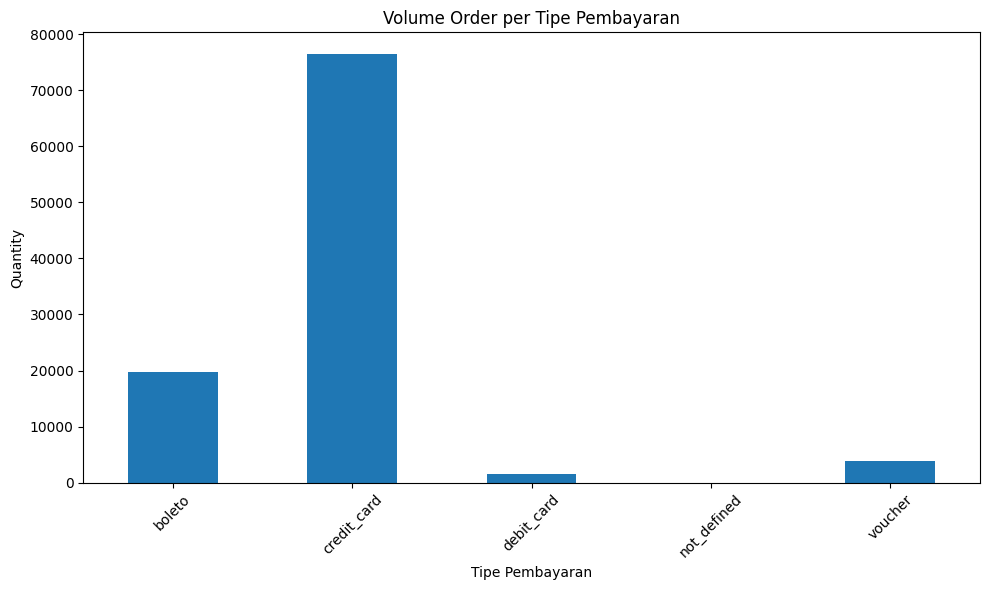

In [61]:
plt.figure(figsize=(10, 6))
payment_type_counts.plot(kind='bar')

plt.title('Volume Order per Tipe Pembayaran')
plt.xlabel('Tipe Pembayaran')
plt.ylabel('Quantity')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

### 6. Berapa rata-rata skor ulasan yang diterima?
Matrics ini digunakan untuk mengevaluasi secara menyeluruh mengenai kualitas pelayanan yang dirasakan pengguna

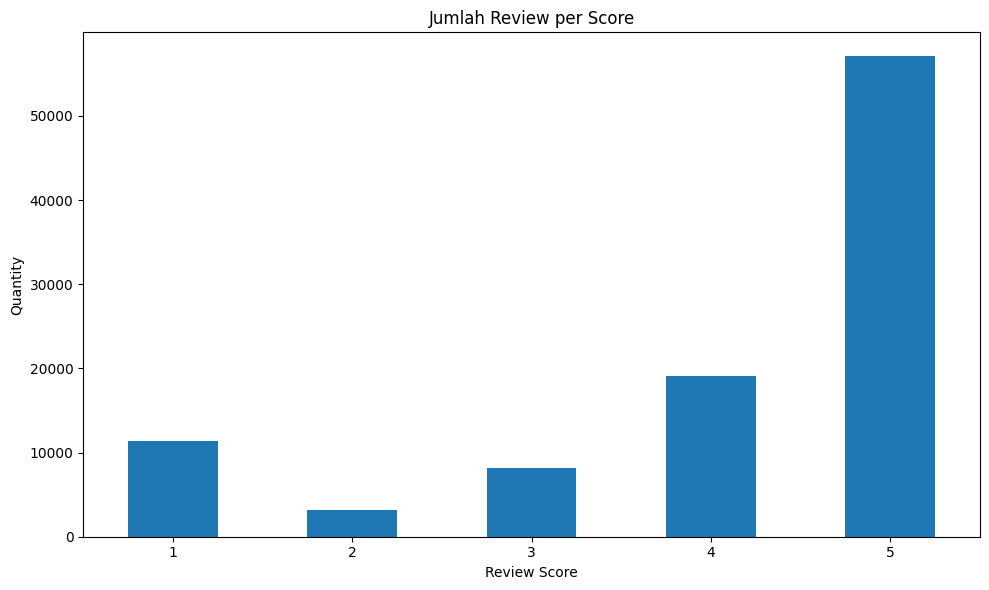

In [62]:
plt.figure(figsize=(10, 6))
review_score_count.plot(kind='bar')

plt.title('Jumlah Review per Score')
plt.xlabel('Review Score')
plt.ylabel('Quantity')
plt.xticks(rotation=0)
plt.tight_layout()

plt.show()

## **Kesimpulan**
1. Berdasarkan analisa RFM yang telah dilakukan, konsumen *e-commerce* pada state São Paulo, Rio de Janeiro, dan Minas Gerais merupakan 3 besar terbaik di Brazil
2. Meskipun 3 daerah diatas merupakan daerah dengan hasil RFM terbaik, namun performa pengiriman di 3 daerah tersebut kurang baik. 3 daerah tersebut menjadi daerah dengan keterlambatan pengiriman terbanyak
3. Pada awal e-commerce ini rilis (2016), produk paling laku ada pada furnitur, kecantikan, dan parfum. Namun, setelah tahun kedua dan ketiga e-commerce ini rilis, pasar mulai menyukai produk-produk perlengkapan mandi, kecantikan dan perlengkapan olahraga. Pertumbuhan minat pada aksesoris komputer juga tidak boleh dipandang sebelah mata.
4. Orderan tertinggi terjadi pada November 2017, hal ini perlu dianalisa, apakah ada event tertentu yang tejadi di bulan tersebut? insight ini juga dapat dimanfaatkan untuk mempersiapkan strategi menghadapi bulan November 2018 yang akan datang
5. Karena konsumen di *e-commerce* ini lebih sering menggunakan kartu kredit untuk pembayarannya, perusahaan dapat mengajukan kerjasama dengan penyedia layanan kartu kredit, baik itu perbankan ataupun lembaga keuangan lain, untuk memberikan benefit tambahan untuk konsumen mereka
6. Perusahaan sudah memiliki review yang baik, yaitu sebesar **4,09** namun perusahaan dapat meningkatkan score dan kepuasan pengguna dengan tetap memperhatikan komentar yang diberikan pada setiap review order. Perusahaan dapat melakukan analisa kata kunci untuk mencari pain and gain dari konsumen. Hasil analisa kata kunci tersebut dapat digunakan sebagai dasar pengembangan layanan kedepannya.

## Persiapan dataset untuk streamlit
Data tidak memungkinkan untuk dijadikan 1 menjadi "main_data.csv" karena ukurannya akan sangat besar ±8 GB. Oleh karena itu, kita akan buat menjadi beberapa dataset berdasarkan kebutuhan Visualisasi Data.
1. Data RFM
2. Order-Product Category
3. Order Detail Data (order review, order payment, orders)
4. Customers Data

In [53]:
#1 RFM Data
rfm_df.to_csv("rfm_data.csv", index=False)

In [54]:
#2 Order Product Category
en_order_prod_category_df.to_csv("order_prod_category.csv", index=False)

In [55]:
#3 Order Detail Data
#merge orders - reviews
order_details_df = pd.merge(orders_df, order_reviews_df, on="order_id", how="left")

# Merge order_payments
order_details_df = pd.merge(order_details_df, order_payments_df, on="order_id", how="left")

# merge order_item
order_details_df = pd.merge(order_details_df, order_items_df, on="order_id", how="left")
order_details_df.to_csv("order_details.csv", index=False)